# Car Colour Detection in Traffic Images
This project detects cars and people in traffic images, identifies blue cars and highlights them with red rectangles, while other cars are marked with blue rectangles. People present at the traffic signal are also detected and counted.


In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [10]:
# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Define COCO classes
CAR_CLASS_ID = 2
PERSON_CLASS_ID = 0

def detect_objects(image_path):
    results = model(image_path)
    image = cv2.imread(image_path)

    car_boxes = []
    person_boxes = []

    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if conf < 0.3:
                continue

            if cls_id == CAR_CLASS_ID:
                car_boxes.append((x1, y1, x2, y2))
            elif cls_id == PERSON_CLASS_ID:
                person_boxes.append((x1, y1, x2, y2))

    return image, car_boxes, person_boxes

def is_blue_car(image, box):
    x1, y1, x2, y2 = box
    car_crop = image[y1:y2, x1:x2]
    hsv = cv2.cvtColor(car_crop, cv2.COLOR_BGR2HSV)

    # Define blue range
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    blue_ratio = np.sum(mask > 0) / mask.size

    return blue_ratio > 0.2  # 20% of area must be blue

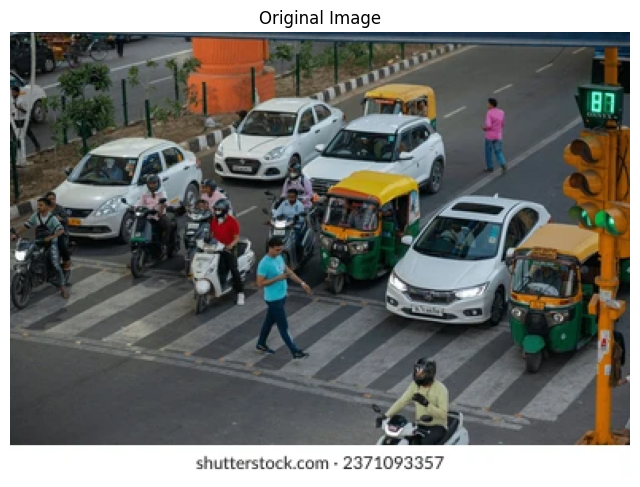

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
image_path = input("Enter image file path (e.g., test.jpg or full path): ")

if not image_path:
    image_path = "test.jpg"  

# Show image before detection
import os

if os.path.exists(image_path):
    img_preview = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()
else:
    print("Image file not found. Please check the path.")


In [12]:
image, car_boxes, person_boxes = detect_objects(image_path)

for box in car_boxes:
    if is_blue_car(image, box):
        color = (0, 0, 255)  # Red for blue car
    else:
        color = (255, 0, 0)  # Blue for other cars
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), color, 2)

for box in person_boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

print(f"Cars Detected: {len(car_boxes)}")
print(f"People Detected: {len(person_boxes)}")


image 1/1 c:\Users\shubham sharma\Desktop\Car_colour_detection\test.jpg: 480x640 8 persons, 4 cars, 5 motorcycles, 2 trucks, 1 traffic light, 199.0ms
Speed: 13.9ms preprocess, 199.0ms inference, 21.2ms postprocess per image at shape (1, 3, 480, 640)
Cars Detected: 4
People Detected: 8


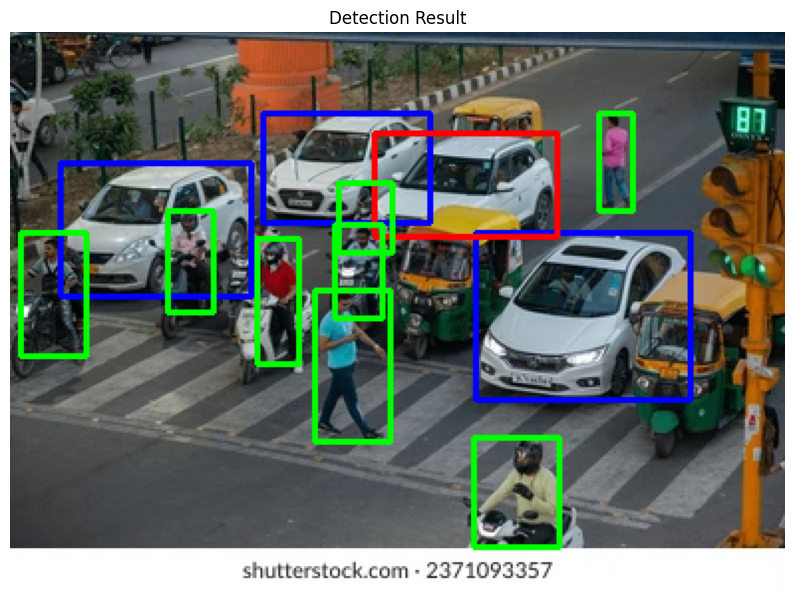

In [13]:
# Convert BGR to RGB for display
output_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(output_rgb)
plt.axis("off")
plt.title("Detection Result")
plt.show()